# Customer Churn

The goal of this project is to create a model to predict whether or not a customer will churn.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

**Is there any NaN cells?**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**The balance of the class labels (Churn)**

<AxesSubplot:xlabel='Churn', ylabel='count'>

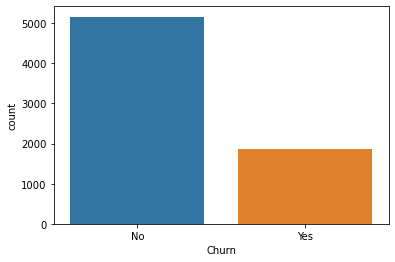

In [7]:
sns.countplot(data=df, x='Churn')

**Distribution of Total Charges between Churn categories**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

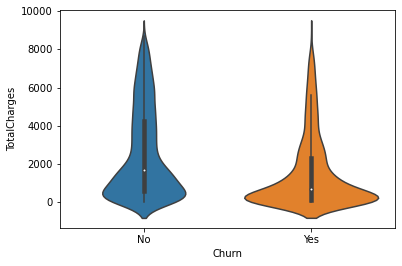

In [8]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

**Distribution of Total Charges per Contract Type**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

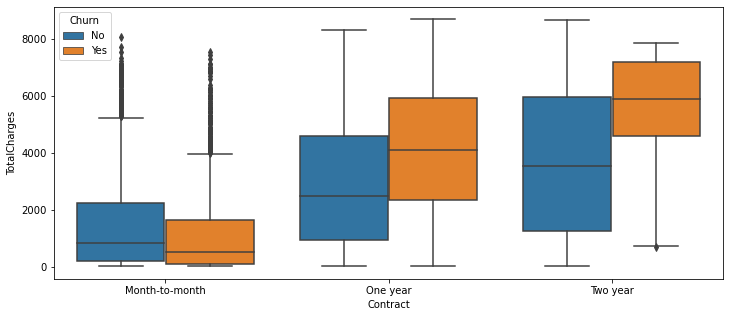

In [9]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

**Feature Correlation to Yes Churn**

In [10]:
df_features = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [11]:
df_features = pd.get_dummies(df_features)

In [12]:
df_features = df_features.drop('Churn_No', axis=1)

In [13]:
correlations = df_features.corr()['Churn_Yes'].drop('Churn_Yes', axis=0).sort_values()

In [14]:
df_correlation = pd.DataFrame(data=correlations)

Text(0.5, 0, 'Feature')

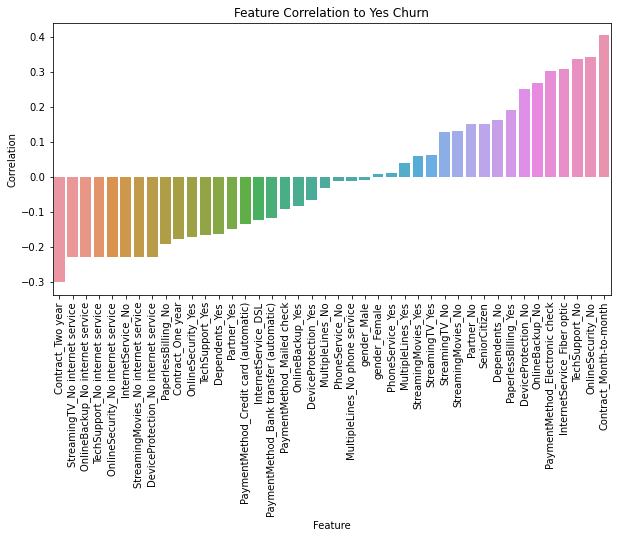

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_correlation, x=df_correlation.index ,y='Churn_Yes')
plt.xticks(rotation=90)
plt.title('Feature Correlation to Yes Churn')
plt.ylabel('Correlation')
plt.xlabel('Feature')

## Churn Analysis

This section focuses on segmenting customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments. 

**Contract Types Available**

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Distribution of tenure, which is the amount of months a customer was or had been on a customer**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

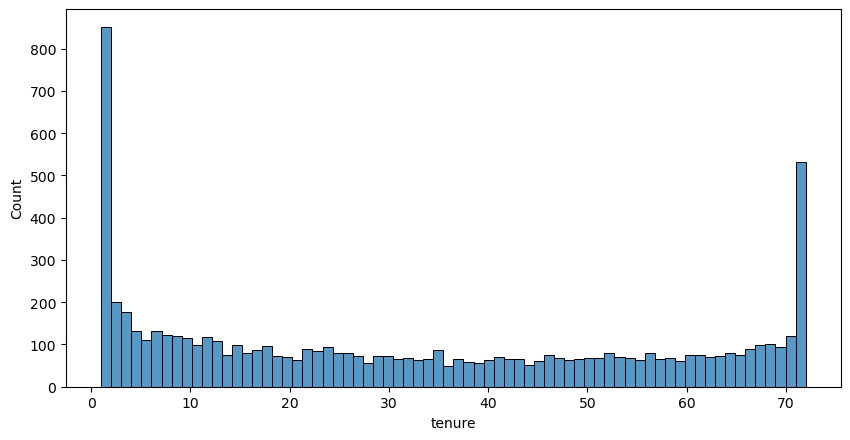

In [17]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(data=df, x='tenure', bins=70)

**Distribution of tenure separated by two additional features (Churn and Contract)**

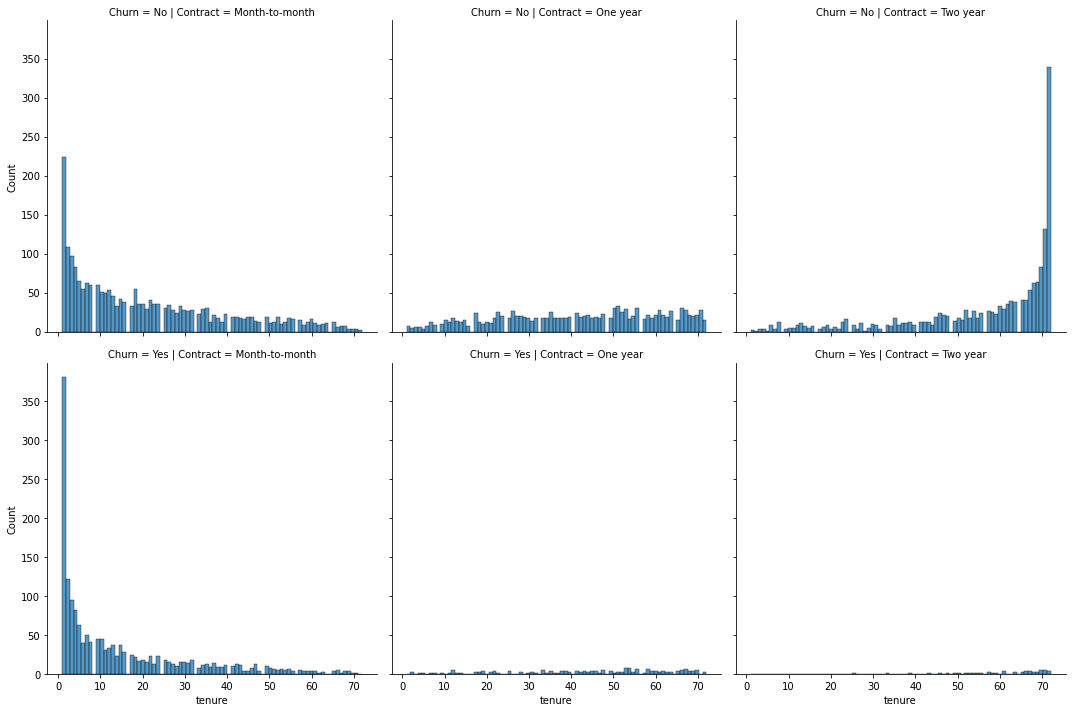

In [18]:
sns.displot(data=df, x='tenure', bins=80, col='Contract', row='Churn')

**Total Charges versus Monthly Charges**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

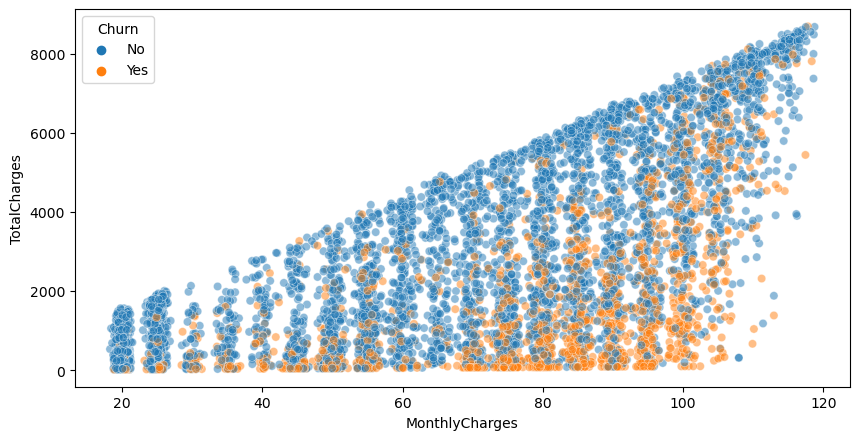

In [19]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

**Cohorts based on Tenure**     
Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.     
Treating each unique tenure group as a cohort, let's calculate the Churn rate (percentage that had Yes Churn) per cohort.

In [20]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [21]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [22]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [23]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0, 0.5, 'Churn Percentage')

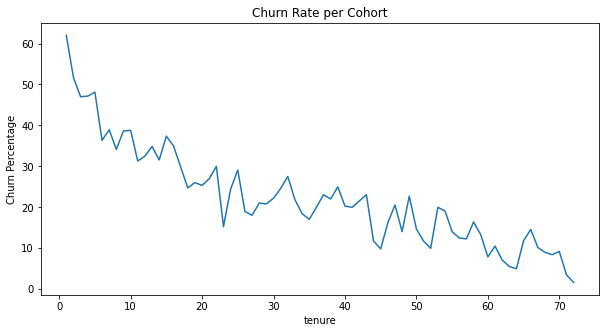

In [24]:
plt.figure(figsize=(10,5))
churn_rate.transpose()['customerID'].plot()
plt.title('Churn Rate per Cohort')
plt.ylabel('Churn Percentage')

**Broader Cohort Groups**    

Based on the tenure column values, let's create a new column called Tenure Cohort that creates 4 separate categories:
- '0-12 Months'
- '12-24 Months'
- '24-48 Months'
- 'Over 48 Months'

In [25]:
def cohort(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [26]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

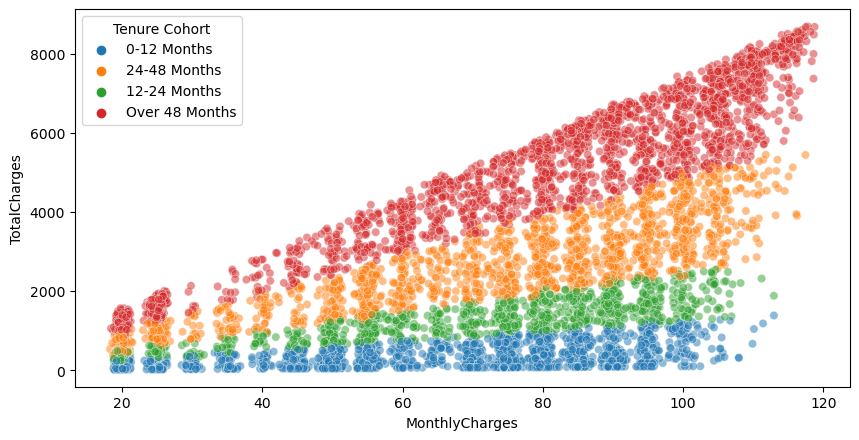

In [27]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5)

**Churn count per cohort**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

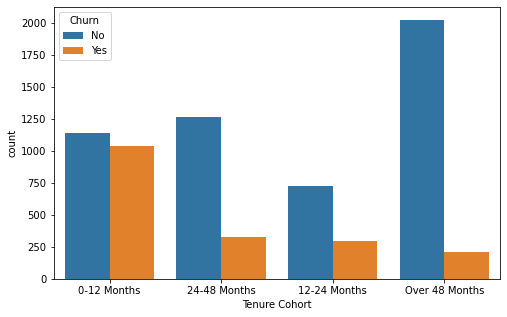

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

This plot shows to us that people that are staying on the service for over forty eight months are not likely to churn, versus if you are on the servie for 0 to 12 months you are more likely to churn.

**The influence of contract type over the churn**

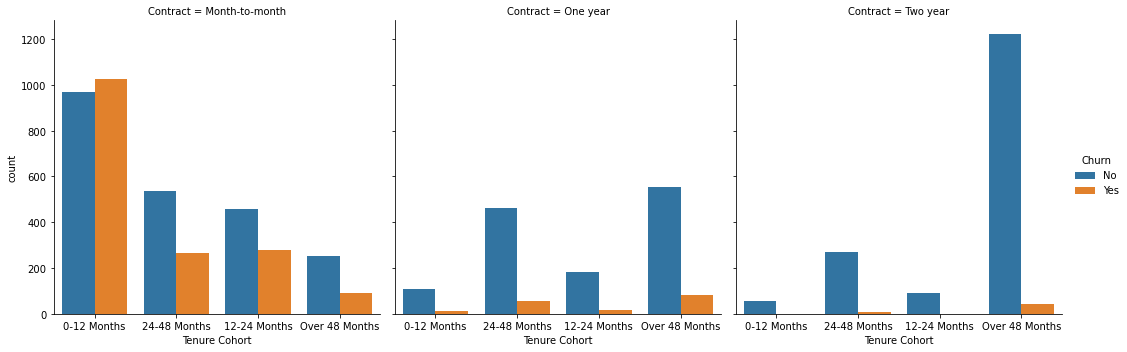

In [29]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count',
            col='Contract')

## Predictive Modeling

**Separating out the data into X features and y label**

In [31]:
X = df.drop(['customerID', 'Churn'], axis=1)

In [32]:
X = pd.get_dummies(X, drop_first='True')

In [33]:
y = df['Churn']

**Train | Test Split**

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Single Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
decision_tree_model = DecisionTreeClassifier()

In [38]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Evaluation of performance metrics**

In [39]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [40]:
decision_tree_predictions = decision_tree_model.predict(X_test)

In [41]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

          No       0.85      0.79      0.82       557
         Yes       0.38      0.49      0.43       147

    accuracy                           0.73       704
   macro avg       0.62      0.64      0.62       704
weighted avg       0.76      0.73      0.74       704



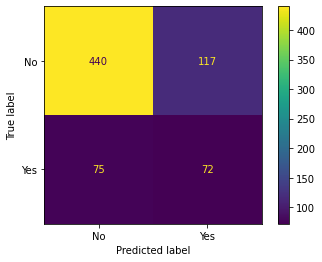

In [42]:
plot_confusion_matrix(decision_tree_model, X_test, y_test)

**Feature Importances**

In [45]:
feature_importance_df = pd.DataFrame(index=X.columns, data=decision_tree_model.feature_importances_,
                                     columns=['Feature Importance']).sort_values('Feature Importance')

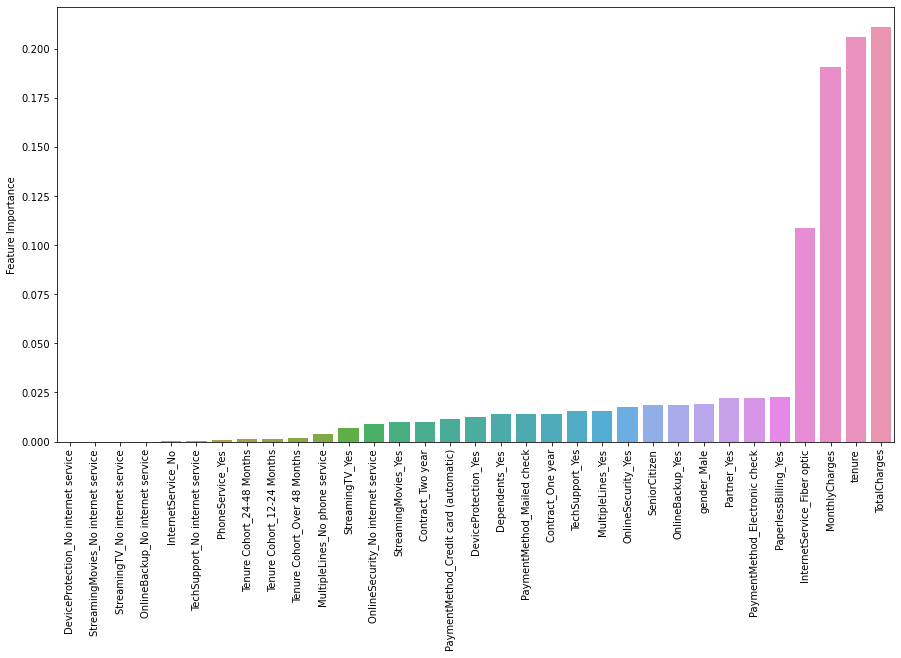

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(data=feature_importance_df, x=feature_importance_df.index, y='Feature Importance')
plt.xticks(rotation=90);

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest_model = RandomForestClassifier()

In [56]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

**Evaluation of performance metrics**

In [57]:
random_forest_predictions = random_forest_model.predict(X_test)

In [58]:
print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



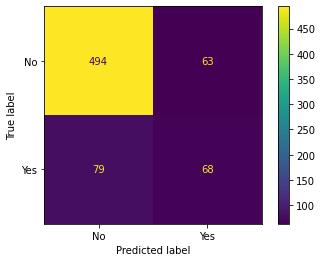

In [59]:
plot_confusion_matrix(random_forest_model, X_test, y_test)

### Boosted Trees

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
adaboost_model = AdaBoostClassifier()

In [62]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier()

**Evaluation of performance metrics**

In [64]:
adaboost_predictions = adaboost_model.predict(X_test)

In [65]:
print(classification_report(y_test, adaboost_predictions))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



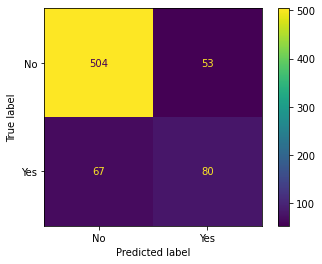

In [66]:
plot_confusion_matrix(adaboost_model, X_test, y_test)

With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.